<a href="https://colab.research.google.com/github/EzpieCo/PyTorch-Crash-Course/blob/main/02-pytorch-worflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 PyTorch Workflow

GitHub repository: https://github.com/EzpieCo/PyTorch-Crash-Course

Crash Course: https://ezpie.vercel.app/courses/machine-learning

In case of an question: https://github.com/EzpieCo/PyTorch-Crash-Course/discussions

---

Every machine learning engineer or deep learning engineer has one essence, that is to take data, build
a model(neural network) to understand patterns in that data and predict what the value will be of an unseen data.

From the next chapter onward we will focus more on the fun part, that is making data, building a model to understand that data and predict with data.

To Start of **straight** and simple we will learn how to make a model that can predict values in a straight line, a simple straight line.

We will build a pytorch model that will learn the pattern in that straight line and make predictions.

# The simple workflow

We will cover a really, yet a very common workflow, with the help of which we will create our model.

![most common pytorch workflow](https://github.com/EzpieCo/PyTorch-Crash-Course/blob/main/images/pytorch-workflow.svg?raw=1)

## Chapter: Preparing data and loading data

Data refers to the information that we use to train, validate, and test our machine learning models. It serves as the foundation for making predictions, gaining insights, and solving real-world problems using machine learning techniques.

Data can come in various forms, such as structured, unstructured, or semi-structured. Structured data is organized and follows a predefined format, typically stored in databases or tabular formats like CSV files. Unstructured data, on the other hand, lacks a specific structure and can include text, images, audio, video, or free-form documents. Semi-structured data lies in between, having some organization but not conforming strictly to a predefined schema.

Hence data an be anything

- Audio
- Video
- Text
- Image

Machine learning is all about:

- Getting data and turning it into numarical values
- Building a model that can learn patterns in that data

For this we will create a linear regression model aka model that will predict values in a stright line.

In [1]:
# importing dependencies
import torch
from torch import nn # nn, short for neural network, is the main building block of neural networks.
import matplotlib.pyplot as plt

# Checking pytorch version

torch.__version__ # version 2.0.1 above will work fine

'2.0.1+cu118'

### Creating the values

In [9]:
# Creating weight and bais
weight = 0.5 # Can be anything, but line will differ
bais = 0.2 # same with the bais

# Creating the features and labels
X = torch.arange(0, 1, 0.02).unsqueeze(1) # remove all the 1 dimensions

# linear regression formula: y = b + wx ... wx*n* (number of times) 
y = bais + (weight * X)

In [22]:
#@title Getting to know our data

# getting the first 10 values
print(f"first ten features: {X[:10]}")
print(f"first ten labels: {y[:10]}")

# checking lenght of features and labels
print(f"number of features: {len(X)}")
print(f"number of labels: {len(y)}")

# Checking the shape of our data
print(f"shape of features: {X.shape}")
print(f"shape of labels: {y.shape}")

first ten features: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
first ten labels: tensor([[0.2000],
        [0.2100],
        [0.2200],
        [0.2300],
        [0.2400],
        [0.2500],
        [0.2600],
        [0.2700],
        [0.2800],
        [0.2900]])
number of features: 50
number of labels: 50
shape of features: torch.Size([50, 1])
shape of labels: torch.Size([50, 1])


### Spliting the values in training and testing sets

We will split data into training and testing sets, which are the most common, validation set can be made, but for this small data not required.

We will use the python's [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for this.

In [18]:
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2, # 0.2/20% of data will be for testing and 80% will be for training
                                                    random_state=46) # changes the testing data, but stays same if value same

### Creating a plot function to plot our data

First rule of machine learning is 'Visulize your data'

Visulize the data first, so that you know what will suit the best.

In [19]:
# Ploting function
def plot(train_data=X_train, train_labels=y_train, 
                     test_data=X_test, test_labels=y_test, 
                     predictions=None):
  
  plt.figure(figsize=(10, 7))

  # training data in green
  plt.scatter(train_data, train_labels, c="g", s=4, label="Training data")
  
  # test data in red
  plt.scatter(test_data, test_labels, c="r", s=4, label="Test data")

  if predictions != None:
    # Plot the predictions in blue
    plt.scatter(test_data, predictions, c="b", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

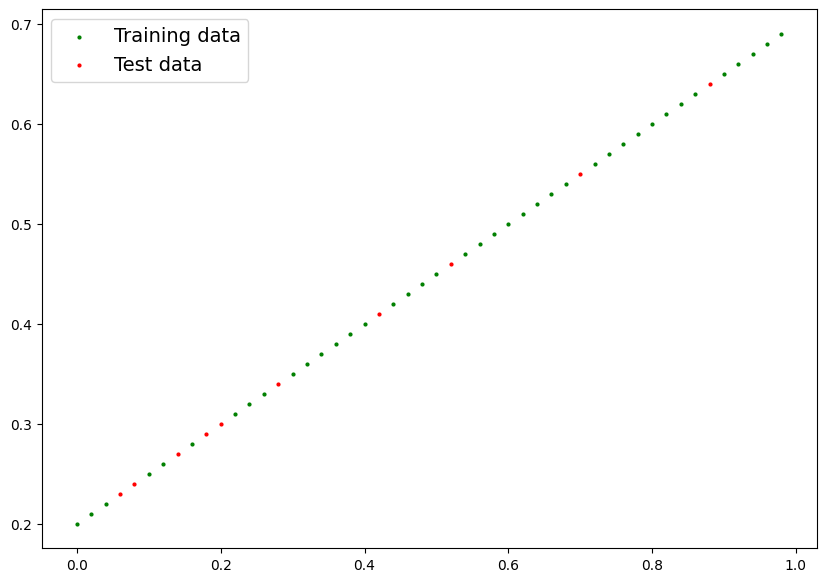

In [20]:
plot() # Checking out our data